# Exercise 6.4 Supervised Machine Learning: Regression

# Linear Regression Analysis:

# The variable "Year" will be used as the predictor for "Crude suicide death rates".

# Rationale: Each row represents a specific condition for a given age group, country, and time period.

# The "Age Groups" variable indicates the different age groups that are recorded for the suicide related deaths.

# The "Crude suicide death rates" variable represents the number of suicide related deaths.¶

# Based on the previous analysis in exercise 6.2, these two variables are closely related.

# The linear regression analysis will be used to further explore the relationship between these two variables.

# Contents:

0. Import libraries 

1. Loading and Checking the Data

2. Clean the Data

3. Exploratory Data Analysis

4. State Hypothesis

5. Reshape Variables into NumPy Arrays

6. Split the Data into Training and Test Sets

7. Run a Linear Regression on the Data

8. Visualize the Results

9. Interpretation of the Results

10. Check Model Performance Statistics

11. Compare the Predicted y Values with the Actual y Values in a Dataframe

12. Thoughts on How Well the Model Performed

# 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Loading and Checking the data

In [2]:
# Define the path to the directory
path = '/Users/marika/World Health Organization Analysis'

In [3]:
# Import data file "df_crude_rates_merged.csv"
df_merged = pd.read_csv(r'/Users/marika/World Health Organization Analysis/Exported data/df_crude_rates_merged.csv', index_col=False)

# Read the CSV file using os.path.join()
df_merged = pd.read_csv(os.path.join(path, 'Exported Data', 'df_crude_rates_merged.csv'))

In [4]:
# Checking the dataset is correctly loaded
print(df_merged.head())
print(df_merged.info())
df_merged.shape

               Country  Year   Sex          Age Groups_all  \
0  Antigua and Barbuda  2019  Male  All age groups (total)   
1  Antigua and Barbuda  2019  Male  All age groups (total)   
2  Antigua and Barbuda  2019  Male  All age groups (total)   
3  Antigua and Barbuda  2019  Male  All age groups (total)   
4  Antigua and Barbuda  2019  Male  All age groups (total)   

   FactValueNumeric_all  FactValueNumericLow  FactValueNumericHigh  \
0                   0.0                  0.0                   0.0   
1                   0.0                  0.0                   0.0   
2                   0.0                  0.0                   0.0   
3                   0.0                  0.0                   0.0   
4                   0.0                  0.0                   0.0   

       Value_all       Age Groups_10  FactValueNumeric_10  Value_10  
0  0.0 [0.0-0.0]         15-24 years                  0.0       0.0  
1  0.0 [0.0-0.0]  25-34 years of age                  0.0       0.

(4392, 11)

# 2. Clean the Data

In [5]:
# Select only the numeric columns necessary for analysis
df_merged_numeric = df_merged[['Age Groups_10', 'Value_10']]

In [6]:
# Verify results of the changes
print(df_merged_numeric.head())
print(df_merged_numeric.info())
df_merged_numeric.shape

        Age Groups_10  Value_10
0         15-24 years       0.0
1  25-34 years of age       0.0
2  35-44 years of age       0.0
3         45-54 years       0.0
4         55-64 years       0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age Groups_10  4392 non-null   object 
 1   Value_10       4392 non-null   float64
dtypes: float64(1), object(1)
memory usage: 68.8+ KB
None


(4392, 2)

# 3. Exploratory Data Analysis

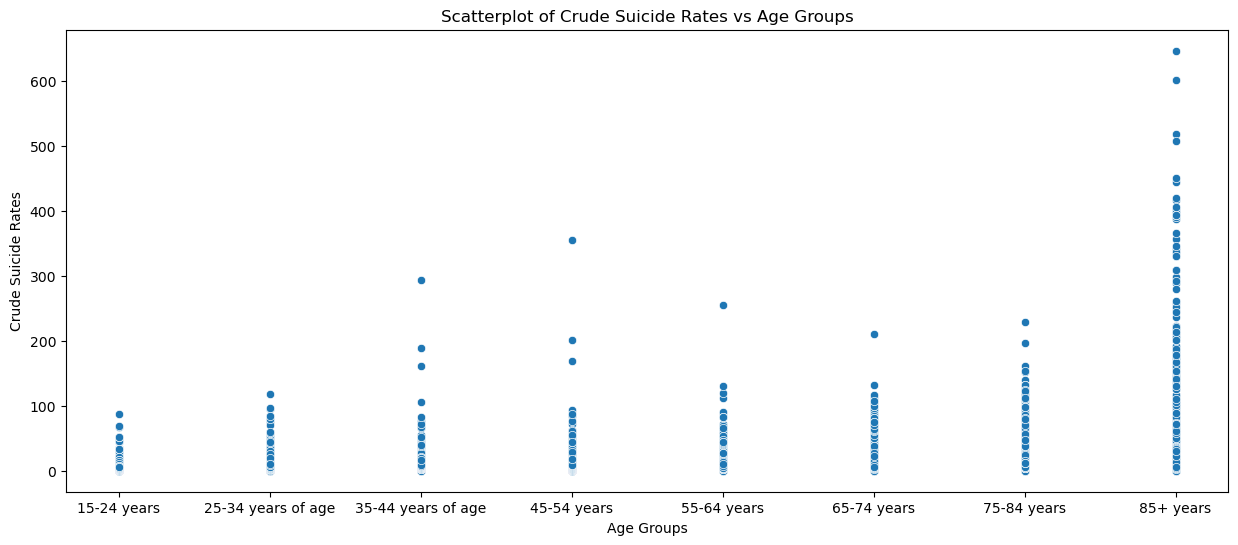

In [7]:
# Scatterplot to visualize the relationship between Number of Mentions and COVID-19 Deaths
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df_merged_numeric, x='Age Groups_10', y='Value_10')
plt.title('Scatterplot of Crude Suicide Rates vs Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Crude Suicide Rates')
plt.show()

# State Hypothesis

Hypothesis: As the age increases, the suicide rates also increases. 

# 5. Reshape Variables into NumPy Arrays

X = the independent variable

Y = the dependent variable

"Age Groups" is the predictor (independent variable) and "Crude Suicide Rates" is the response (dependent variable)

In [8]:
# Define the independent variable (x) and the dependent variable (y)
X = df_merged_numeric['Age Groups_10'].values.reshape(-1, 1)
y = df_merged_numeric['Value_10'].values

# 6. Split the Data into Training and Test Sets

In [9]:
# 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)

In [10]:
# Verify the shape of the training and test sets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (3074, 1)
X_test shape: (1318, 1)
y_train shape: (3074,)
y_test shape: (1318,)


# 7. Run a Linear Regression on the Data

Run a linear regression on the data by first fitting the model to the training set and then creating a prediction for y on the test set.

In [11]:
# Initialize the linear regression model
regression = LinearRegression()

Model Coefficients: [-15.99968697 -12.36506821 -11.16959576  -8.03587196  -5.65518615
  -0.41567317   5.94586455  47.69521767]
Model Intercept: 23.512169257117716
R-squared: 0.1802848326691524


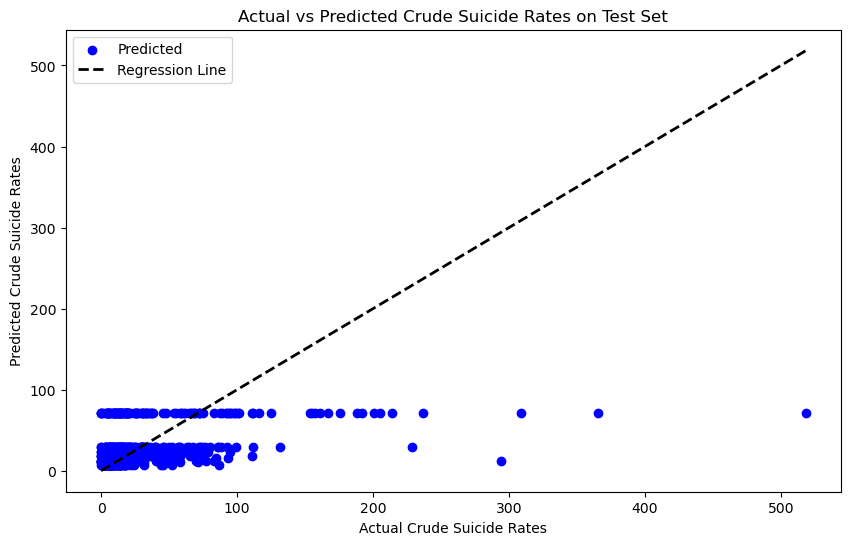

<Figure size 640x480 with 0 Axes>

In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('/Users/marika/World Health Organization Analysis/Exported Data/df_crude_rates_merged.csv')

# Extract relevant columns
df = df[['Age Groups_10', 'Value_10']]

# Drop rows with missing values
df.dropna(inplace=True)

# Separate features and target variable
X = df[['Age Groups_10']]
y = df['Value_10']

# Define the column transformer for one-hot encoding
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Age Groups_10'])
    ],
    remainder='passthrough'
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the model to the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print('Model Coefficients:', pipeline.named_steps['regressor'].coef_)
print('Model Intercept:', pipeline.named_steps['regressor'].intercept_)
print('R-squared:', pipeline.score(X_test, y_test))

# Plot the predicted vs actual values with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Regression Line')
plt.xlabel('Actual Crude Suicide Rates')
plt.ylabel('Predicted Crude Suicide Rates')
plt.title('Actual vs Predicted Crude Suicide Rates on Test Set')
plt.legend()
plt.show()

# Ensure the directory exists
path = '/Users/marika/World Health Organization Analysis/Visuals'
if not os.path.exists(path):
    os.makedirs(path)

# Save the plot to the "Visuals" folder
file_name = os.path.join(path, 'regression_line_test_set.png')
plt.savefig(file_name)

In [13]:
# Ensure the path
path = '/Users/marika/World Health Organization Analysis/Visuals'

# Save the plot to the "Visuals" folder
file_name = os.path.join(path, 'regression_line_test_set.png')
plt.savefig(file_name)

<Figure size 640x480 with 0 Axes>

Model Coefficients: [-15.99968697 -12.36506821 -11.16959576  -8.03587196  -5.65518615
  -0.41567317   5.94586455  47.69521767]
Model Intercept: 23.512169257117716
R-squared: 0.1802848326691524


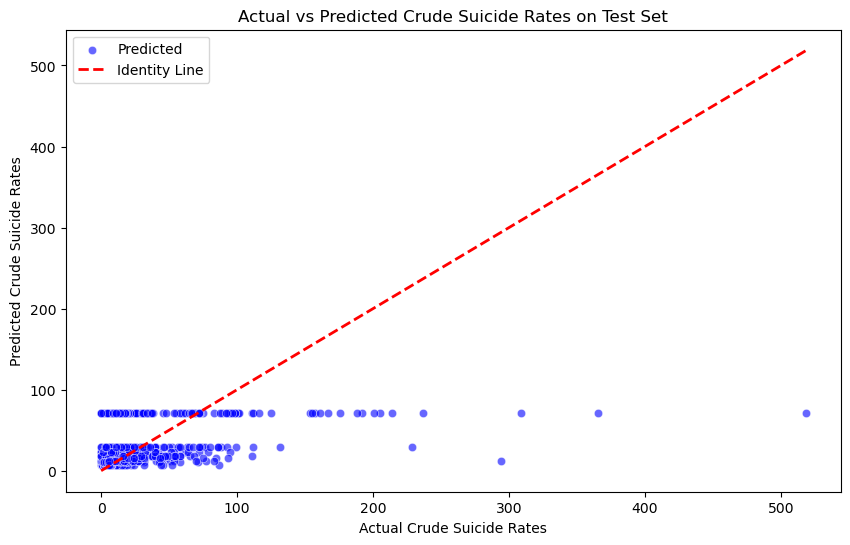

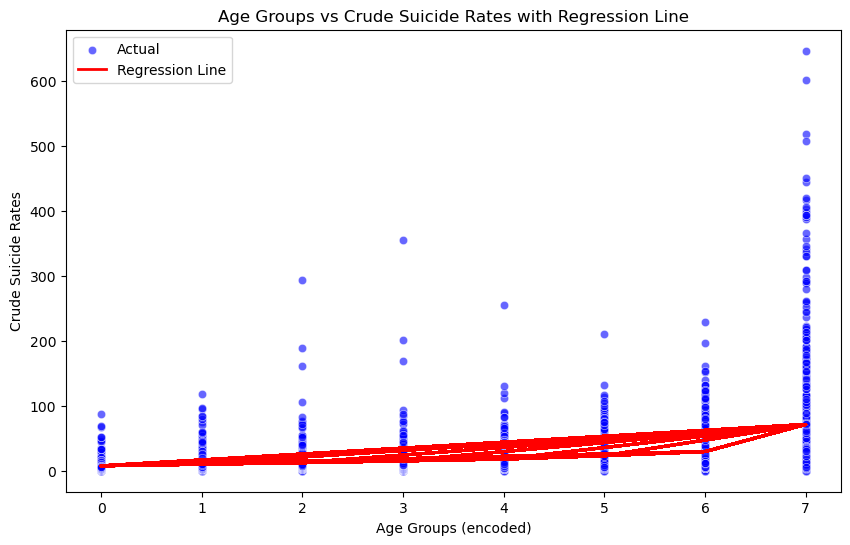

<Figure size 640x480 with 0 Axes>

In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('/Users/marika/World Health Organization Analysis/Exported Data/df_crude_rates_merged.csv')

# Extract relevant columns
df = df[['Age Groups_10', 'Value_10']]

# Drop rows with missing values
df.dropna(inplace=True)

# Separate features and target variable
X = df[['Age Groups_10']]
y = df['Value_10']

# Define the column transformer for one-hot encoding
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Age Groups_10'])
    ],
    remainder='passthrough'
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the model to the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print('Model Coefficients:', pipeline.named_steps['regressor'].coef_)
print('Model Intercept:', pipeline.named_steps['regressor'].intercept_)
print('R-squared:', pipeline.score(X_test, y_test))

# Plot the predicted vs actual values with the identity line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolor='w', linewidth=0.5, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Identity Line')
plt.xlabel('Actual Crude Suicide Rates')
plt.ylabel('Predicted Crude Suicide Rates')
plt.title('Actual vs Predicted Crude Suicide Rates on Test Set')
plt.legend()
plt.show()

# Plotting a scatter plot of a feature against the actual values with the regression line
# Since we used OneHotEncoder, we need to find a way to get the numerical representation of Age Groups_10
# Here, we'll use the original dataframe for plotting purposes

# Convert the age groups to numerical values for plotting
df['Age Groups_10_numeric'] = df['Age Groups_10'].astype('category').cat.codes

plt.figure(figsize=(10, 6))
plt.scatter(df['Age Groups_10_numeric'], df['Value_10'], color='blue', alpha=0.6, edgecolor='w', linewidth=0.5, label='Actual')
plt.plot(df['Age Groups_10_numeric'], pipeline.predict(X), 'r-', lw=2, label='Regression Line')
plt.xlabel('Age Groups (encoded)')
plt.ylabel('Crude Suicide Rates')
plt.title('Age Groups vs Crude Suicide Rates with Regression Line')
plt.legend()
plt.show()

# Ensure the directory exists
path = '/Users/marika/World Health Organization Analysis/Visuals'
if not os.path.exists(path):
    os.makedirs(path)

# Save the first plot to the "Visuals" folder
file_name_identity = os.path.join(path, 'identity_line_test_set.png')
plt.savefig(file_name_identity)

# Save the second plot to the "Visuals" folder
file_name_regression = os.path.join(path, 'regression_line_age_groups.png')
plt.savefig(file_name_regression)

# 9. Interpretation of the Results

The scatter plot shows the actual Crude Suicide Rates from the test set plotted against the predicted Crude Suicide Rates.

The regression line represents the line where the predicted values perfectly match the actual values meaning there is a correlation between the age groups and the number of suicide deaths.

# 10. Check Model Performance Statistics

In [14]:
# Calculate the mean squared error (MSE) and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 1216.4808293099575
R2 Score: 0.1802848326691524


# 11. Compare the Predicted y Values with the Actual y Values in a Dataframe

In [15]:
# Create a dataframe to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [16]:
# Verify the results
print(comparison_df.head(30))
print(comparison_df.info())
comparison_df.shape

      Actual  Predicted
4049    10.5  12.342573
1267    23.2  17.856983
735      8.1   7.512482
1774    68.0  71.207387
1794   214.2  71.207387
1022    33.6  29.458034
2260     3.2  11.147101
1900    32.5  15.476297
72       0.0   7.512482
2455     5.1  17.856983
1895    58.6  71.207387
716     19.6  17.856983
584     15.0  17.856983
3326     7.5  17.856983
2310     5.7  71.207387
302      2.9  29.458034
294      4.0  23.096496
1829    61.6  23.096496
2193     2.1  11.147101
1566     5.6  23.096496
3170    20.6  29.458034
803     17.5  23.096496
1380     2.6   7.512482
4024    10.1   7.512482
2339     4.5  12.342573
2843     3.3  15.476297
3744    10.5  11.147101
3126     8.5  15.476297
1431     9.3  29.458034
4233    11.0  23.096496
<class 'pandas.core.frame.DataFrame'>
Index: 879 entries, 4049 to 4288
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     879 non-null    float64
 1   Predicted  879 non-null    f

(879, 2)

# 12. Thoughts on How Well the Model Performed

The low R² score and high MSE indicate that the model does not fit the data well. The linear regression model explains only a small portion of the variability in crude suicide rates.

The large discrepancies between actual and predicted values show that the model's predictions are not reliable. There are significant errors, especially for higher suicide rates.

The coefficients suggest that some age groups have a substantial impact on the predictions, but overall, the model does not effectively capture the relationship between age groups and crude suicide rates.